# 04: Partial Differential Equation and Finite Difference

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/04-pde-fdm/04-pde-fdm-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/04-pde-fdm/04-pde-fdm.ipynb)

A differential equation is any equation that contains a derivative. 

Partial Differential Equations (PDEs) are equations that contain unknown multivariable functions and their partial derivatives. They are utilized to formulate problems involving functions of several variables, and are foundational in the study of Scientific Machine Learning (SciML) where they represent various physical, biological, and chemical processes.

![Types of PDEs](pde-types.png)

## Basics of PDEs

A PDE is an equation which involves an unknown function (or functions) of multiple variables and its (or their) partial derivatives. A PDE is "partial" because it contains partial derivatives (derivatives with respect to one of several variables) rather than just ordinary derivatives.

Mathematically, a generic PDE can be represented as:

$$F(x_1, x_2, ..., x_n, u, u_{x_1}, u_{x_2}, ..., u_{x_n}, u_{x_1x_1}, ..., u_{x_nx_n}, ...) = 0$$

where:
- $ x_1, x_2, ..., x_n $ are the independent variables.
- $ u $ is the unknown function of $ x_1, x_2, ..., x_n $ which we aim to find.
- $ u_{x_i} $ denotes the partial derivative of $ u $ with respect to $ x_i $.
- The equation is set to zero, as PDEs typically equate expressions to zero.

![Applications of PDE](pde-applications.png)


## Example: 1D Heat Transfer - The Heat Equation

One of the classical PDEs in physics is the 1D heat equation, which describes the distribution of heat in a given region over time. It is a second-order linear parabolic PDE.

For a 1D rod, the heat equation is given by:

$$\frac{\partial u(x, t)}{\partial t} = \alpha \frac{\partial^2 u(x, t)}{\partial x^2}$$

Where:
- $ u(x, t) $ represents the temperature at position $ x $ and time $ t $.
- $ \alpha $ is the thermal diffusivity of the material of the rod, a positive constant.

The heat equation states that the rate of change of temperature in time ($ \frac{\partial u}{\partial t} $) at any point in the rod is proportional to the curvature of the temperature profile at that point ($ \frac{\partial^2 u}{\partial x^2} $). This curvature represents how the temperature gradient changes spatially.

To fully solve this PDE, boundary conditions (e.g., fixed temperature at the ends of the rod) and initial conditions (e.g., initial temperature distribution) would also be required.

Numerical differentiation methods are essential in solving partial differential equations (PDEs) like the heat equation. The primary idea is to discretize the derivatives, replacing them with finite differences that can be evaluated at grid points in space and time. Below, I'll discuss how to approach the 1D heat equation using numerical differentiation techniques, particularly the finite difference method.



## Numerical differentation

Numerical differentiation is the process of finding the numerical value of a derivative of a given function at a given point.

A simple two-point estimation is to compute the slope of a nearby secant line through the points $(x, f(x))$ and $(x + h, f(x + h))$. Choosing a small number $h$, $h$ represents a small change in $x$ ($h <<1$ and is positive). The slope of this line is 

![secant slope](derivative.png)

$$f^\prime(x) \approxeq \lim_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}$$

Three basic types are commonly considered: forward, backward, and central differences.


![differencing schemes](finite-difference-methods.png)

### Forward difference


$$f^\prime(x) = \frac{f(x+h) - f(x)}{h} + O(h)$$


In [1]:
import math

def forward_diff(f, x, h=1e-4):
    dfx = (f(x+h) - f(x))/h
    return dfx

x = 0.5
df = forward_diff(math.cos, x)
print ("first derivative of cos(x) is {}, which is -sin(x) {}".format(df, -math.sin(x)))
print("O(h) is ", (df + math.sin(x)))

first derivative of cos(x) is -0.4794694169341085, which is -sin(x) -0.479425538604203
O(h) is  -4.387832990548901e-05


### Backward difference


$$f^\prime(x) = \frac{f(x) - f(x-h)}{h} + O(h)$$

In [2]:
import math

def backward_diff(f, x, h=1e-4):
    dfx = (f(x) - f(x-h))/h
    return dfx

x = 0.5
df = backward_diff(math.cos, x)
print ("first derivative of cos(x) is {}, which is -sin(x) {}".format(df, -math.sin(x)))
print("O(h) is ", (df + math.sin(x)))

first derivative of cos(x) is -0.47938165867678073, which is -sin(x) -0.479425538604203
O(h) is  4.3879927422274534e-05


### Central difference method


$$f^\prime(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^2)$$

In [3]:
import math

def central_diff(f, x, h=1e-4):
    dfx = (f(x+h) - f(x-h))/(2*h)
    return dfx

x = 0.5
df = central_diff(math.cos, x)
print ("first derivative of cos(x) is {}, which is -sin(x) {}".format(df, -math.sin(x)))
print("O(h^2) is ", (df + math.sin(x)))

first derivative of cos(x) is -0.4794255378054446, which is -sin(x) -0.479425538604203
O(h^2) is  7.98758392761556e-10


### Second order central difference

$$f^{\prime\prime}(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} + O(h^2)$$

In [4]:
import math

def central_second_diff(f, x, h=1e-4):
    dfx = (f(x+h) -2*f(x) + f(x-h))/(h**2)
    return dfx

x = 0.5
df = central_second_diff(math.cos, x)
print ("second derivative of cos(x) is {}, which is -cos(x) {}".format(df, -math.cos(x)))
print("O(h^2) is ", (df + math.sin(x)))

second derivative of cos(x) is -0.8775825732776354, which is -cos(x) -0.8775825618903728
O(h^2) is  -0.39815703467343244


## Finite Difference Solution for the 1D Heat Equation

Replace the derivatives in the heat equation with finite difference approximations to obtain a discretized version of the problem. Given a point $i$ in space and time $n$:

### Finite Difference Discretization

The heat equation can be approximated as:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = \alpha \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{(\Delta x)^2}
$$

Rearranging the equation, we can express $u_i^{n+1}$ explicitly in terms of values at time $n$:

$$
u_i^{n+1} = u_i^n + \alpha \frac{\Delta t}{(\Delta x)^2} \left( u_{i+1}^n - 2u_i^n + u_{i-1}^n \right)
$$

This equation allows for an explicit update scheme.

### Stability Consideration

The stability of the explicit scheme is crucial. It's primarily governed by the Courant–Friedrichs–Lewy (CFL) condition:

$$
\alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
$$

If the above condition is not met, the solution can diverge, leading to numerical instability.

### Implicit Methods

For situations where the CFL condition restricts the time step size significantly, implicit methods can be beneficial. One of the most popular implicit methods for the heat equation is the Crank-Nicolson method. Implicit methods, including Crank-Nicolson, are often unconditionally stable, meaning they aren't bound by the CFL condition. They require solving a system of linear equations at each time step but offer increased stability, especially for larger time steps.


## 1D heat problem

> Create an initial source at the center of the rod and both ends have fixed temperature of 0.

CFL value: 0.0009801 should be below 0.5


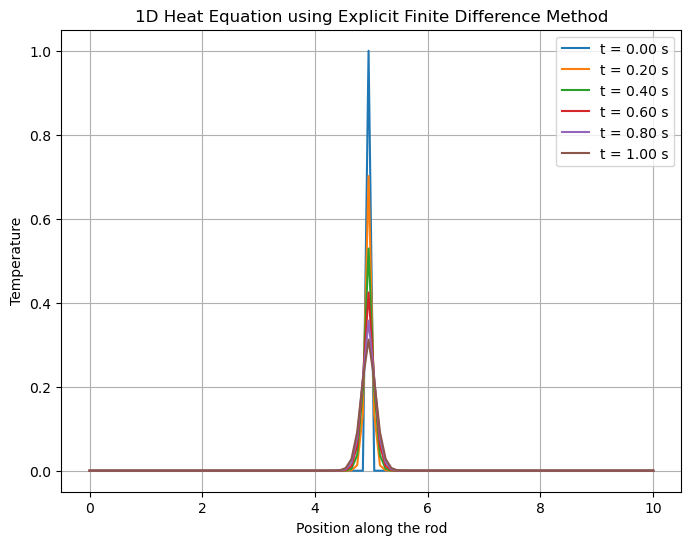

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10.0          # Length of the rod
alpha = 0.01      # Thermal diffusivity
Nx = 100          # Number of spatial points
dx = L / (Nx-1)   # Spatial step size
dt = 0.001        # Time step
Nt = 1000         # Number of time steps
gamma = alpha * dt / dx**2  # Stability parameter (should be <= 0.5 for stability)

# Initial condition (e.g., all zeros except for a peak in the center)
u = np.zeros(Nx)
u[int((Nx-1)/2)] = 1

# Boundary conditions (e.g., kept at zero)
u[0] = 0
u[-1] = 0

# Storage for solution at each time step for plotting
u_all = [u.copy()]

# Time-stepping loop
for n in range(0, Nt):
    u_old = u.copy()
    for i in range(1, Nx-1):
        u[i] = u_old[i] + gamma * (u_old[i+1] - 2*u_old[i] + u_old[i-1])
    u_all.append(u.copy())

# Plotting
plt.figure(figsize=(8, 6))
for i in range(0, Nt+1, int(Nt/5)):  # Only plotting some time steps for clarity
    plt.plot(np.linspace(0, L, Nx), u_all[i], label=f"t = {i*dt:.2f} s")
    
print("CFL value: {} should be below 0.5".format(gamma))
plt.title("1D Heat Equation using Explicit Finite Difference Method")
plt.xlabel("Position along the rod")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

## 2D Heat transfer problem

Heat transfer is a fundamental phenomenon that occurs in various engineering processes. While 1D heat transfer problems provide a foundational understanding, most practical scenarios involve multi-dimensional heat conduction. For this reason, understanding the behavior of heat transfer in two or more dimensions becomes crucial for many engineering applications.

In this section, we delve into the 2D heat conduction problem. It's important to note that while the concepts of heat conduction remain the same in two dimensions, the mathematical representation becomes more involved. We will examine the governing differential equation that models this process, known as the 2D heat equation. This equation describes the distribution of temperature within a 2D domain as it evolves over time, taking into account the material's thermal diffusivity.

To solve this partial differential equation (PDE), we'll employ the finite difference method, which approximates derivatives by discrete differences over a meshed domain. Here, we'll focus on a rectangular mesh to keep our discussion simple and relatable.

![2D Heat transfer](2d-heat-transfer.png)

## Governing differential equation

$\frac{\partial T}{\partial t} = \alpha \left[ \frac{\partial ^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}\right]$

T = temperature  
t = time  
x = horizontal dimension  
y = vertical dimension  
$\alpha$ = thermal diffusivity  

## Finite different approximation for a rectangular mesh
$\frac{\partial T}{\partial t} \approx \frac{T_{ij}^{k+1} - T_{ij}^{k}}{\Delta t}$  

$\frac{\partial ^2 T}{\partial x^2} \approx \alpha \frac{T_{i+1,j}^k -2T_{i,j}^k + T_{i-1,j}^k}{\Delta x^2}$  

$\frac{\partial ^2 T}{\partial y^2} \approx \alpha \frac{T_{1,j+1}^k -2T_{i,j}^k + T_{i,j-1}^k}{\Delta y^2}$  

$\Delta x$ = node spacing in x-direction  
$\Delta y$ = node spacing in y-direction  
$\Delta t$ = time step  
i = index counter for x-direction  
j = index counter for y-direction  
k = index counter for time  

The resulting equation is:

$\frac{T_{ij}^{k+1} - T_{ij}^{k}}{\Delta t} = \alpha \frac{T_{i+1,j}^k -2T_{i,j}^k + T_{i-1,j}^k}{\Delta x^2} + \alpha \frac{T_{1,j+1}^k -2T_{i,j}^k + T_{i,j-1}^k}{\Delta y^2}$  

If $\Delta x = \Delta y$ we obtain the following

$\frac{T_{ij}^{k+1} - T_{ij}^{k}}{\Delta t} = \alpha \frac{T_{i+1,j}^k + T_{1,j+1}^k -4T_{i,j}^k + T_{i-1,j}^k + T_{i,j-1}^k}{\Delta x^2}$  

Solving for $T_{ij}^{k+1}$ and re-arranging terms

$T_{ij}^{k+1} = \gamma\left(T_{i+1,j}^k + T_{1,j+1}^k + T_{i-1,j}^k + T_{i,j-1}^k\right) + \left(1 - 4\gamma\right)T_{ij}^k$  

where $\gamma = \frac{\alpha \Delta t}{\Delta x^2}$


> Note: the solution will become unstable if $\left(1 - \frac{4\alpha \Delta t}{\Delta x^2} \right) < 0$. We therefore set the time step as shown below.

$\Delta t = \frac{\Delta x^2}{4\alpha}$  

Using the time step above, we find that $\left(1-4\gamma\right)=0$ and therefore the resulting equation is:

$T_{ij}^{k+1} = \gamma\left(T_{i+1,j}^k + T_{i,j+1}^k + T_{i-1,j}^k + T_{i,j-1}^k\right)$

### Define input variables

`L`         = plate length  
`Nt`        = number of time steps  
`Nx`        = number of increments in x-direction (same as y-direction since plate is square)  
`alpha`     = thermal diffusivity  
`dx`        = node spacing  
`dt`        = time increment  
`T_top`     = temperature of top of plate  
`T_left`    = temperature of left side of plate  
`T_right`   = temperature of right side of plate  
`T_bottom`  = temperature of bottom of plate  
`T_initial` = initial temperature of plate  

In [5]:
import numpy as np
import matplotlib.pyplot as plt

L = 50
Nt = 1000
Nx = 50
alpha = 2.0
dx = L/Nx
dt = dx**2/4.0/alpha
gamma = alpha*dt/dx/dx
T_top = 100.0
T_left = 0.0
T_right = 0.0
T_bottom = 0.0
T_initial = 0.0

### Initialize boundary conditions

In [13]:
# Initialize Numpy array T to store temperature values
T_init = np.full((Nt,Nx,Nx),T_initial,dtype=float)
T_init[:,:,:1] = T_left
T_init[:,:,Nx-1] = T_right
T_init[:,:1,:] = T_bottom
T_init[:,Nx-1:, :] = T_top

### 2D Finite Difference Heat Transfer

In [14]:
def heat_transfer(T,gamma):
    Nt = len(T)
    Nx = len(T[0])
    for k in range(0,Nt-1,1):
        for i in range(1,Nx-1,1):
            for j in range(1,Nx-1,1):
                T[k+1,i,j] = gamma*(T[k,i+1,j] + T[k,i-1,j] + T[k,i,j+1] + T[k,i,j-1])
    return T

### Plot results

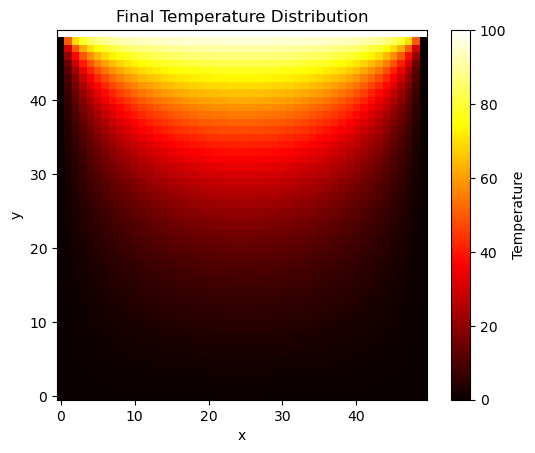

In [19]:
T_final = heat_transfer(T_init, gamma)

# Plotting the final temperature distribution
plt.imshow(T_final[-1], cmap='hot', origin='lower')
plt.colorbar(label='Temperature')
plt.title("Final Temperature Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Animate with time

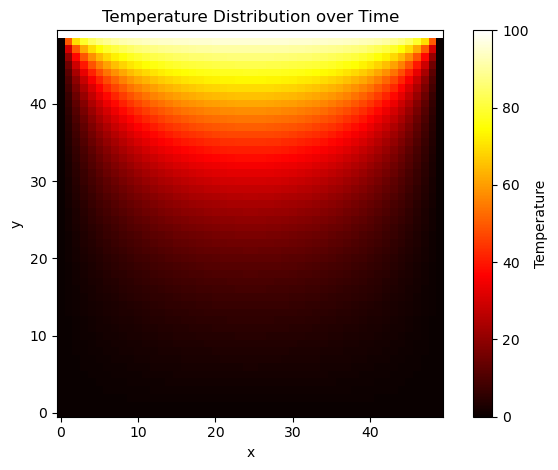

In [22]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Determine the minimum and maximum temperature values in the entire dataset
vmin = T_final.min()
vmax = T_final.max()

# Setting up the figure, the axis, and the plot element for the animation
fig, ax = plt.subplots()
im = ax.imshow(T_final[0], cmap='hot', origin='lower', animated=True, vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im, ax=ax, label='Temperature')
ax.set_title("Temperature Distribution over Time")
ax.set_xlabel("x")
ax.set_ylabel("y")

def update(frame):
    im.set_array(T_final[frame*50])
    return [im]

ani = FuncAnimation(fig, update, frames=Nt//50, blit=True)

plt.tight_layout()

# Display the animation
HTML(ani.to_jshtml())

## Writing convolution rather than a loop

![Convolution](convolution.png)

In [24]:
import numpy as np
from scipy.signal import convolve

def heat_transfer_conv(T, gamma):
    Nt = len(T)
    Nx = len(T[0])
    # Define the kernel for convolution (Laplacian operator)
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

    # Ensure u is a NumPy array
    T = np.array(T)

    for k in range(0,Nt - 1, 1):
        # Convolve u[k] with the kernel, then multiply by gamma and add u[k]
        T[k + 1, 1:Nx - 1:1, 1:Nx - 1:1] = (
            gamma * convolve(T[k], kernel, mode='same')[1:Nx - 1:1, 1:Nx - 1:1] + T[k, 1:Nx - 1:1, 1:Nx - 1:1]
        )
    return T

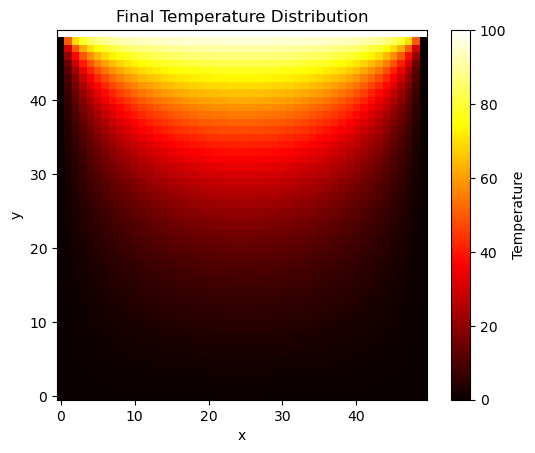

In [26]:
T_conv = heat_transfer_conv(T_init, gamma)

# Plotting the final temperature distribution
plt.imshow(T_conv[-1], cmap='hot', origin='lower')
plt.colorbar(label='Temperature')
plt.title("Final Temperature Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Compare the two versions

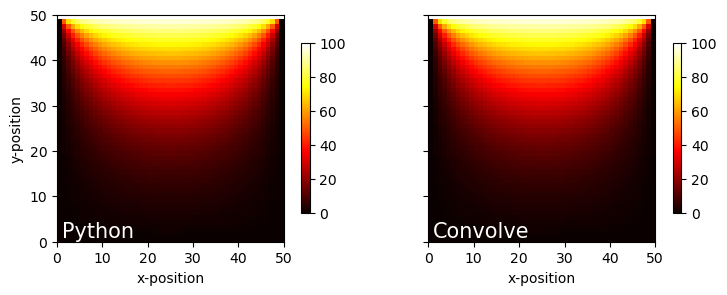

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(8,3),sharey='row')
k = 999
data = {'Python':T_final[k], 'Convolve':T_conv[k]}
i = 0
for key, value in data.items():
    pcm = ax[i].pcolormesh(value, cmap=plt.cm.hot, vmin=0, vmax=100)
    ax[i].set_xlabel('x-position')
    ax[i].set_aspect('equal')
    ax[i].annotate(key, xy=(1,1), c='white', fontsize=15)
    fig.colorbar(pcm,ax=ax[i],shrink=0.75)
    i+=1    
ax[0].set_ylabel('y-position')
#fig.colorbar(pcm)
plt.tight_layout()

> For more information on accelerating these numerical methods, refer to [Accelerating Python](https://kks32-courses.github.io/accelerating-python/README.html)